# 画像処理2: 画像の生成・保存

## 1.  画像の生成と保存
### 1.1 カラー画像の生成

画像処理1(ImageProcessing1.ipynb)の1.3で読み込んだ画像を作ってみましょう。   


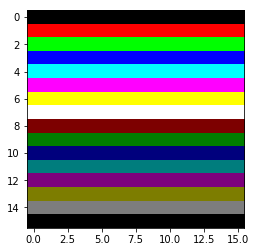

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 横16画素、縦16画素で、3チャネル、1画素あたり8-bitで0埋めの配列を生成
img_gen = np.zeros((16, 16, 3), np.uint8)

# 各列ごとにいろを入れていきましょう
img_gen[0,:] = [0, 0, 0] # 黒
img_gen[1,:] = [255, 0, 0] # 赤
img_gen[2,:] = [0, 255, 0] # 緑
img_gen[3,:] = [0, 0, 255] # 青
img_gen[4,:] = [0, 255, 255] # シアン
img_gen[5,:] = [255, 0, 255] # マゼンタ
img_gen[6,:] = [255, 255, 0] # イエロー
img_gen[7,:] = [255, 255, 255] # 白
img_gen[8,:] = [125, 0, 0]
img_gen[9,:] = [0, 125, 0]
img_gen[10,:] = [0, 0, 125]
img_gen[11,:] = [0, 125, 125]
img_gen[12,:] = [125, 0, 125]
img_gen[13,:] = [125, 125, 0]
img_gen[14,:] = [125, 125, 125]
img_gen[7,:] = [255, 255, 255]

plt.imshow(img_gen)


### 1.2 画像の保存

opencvの画像形式で生成した画像はcv2.imwrite()という関数で保存することができます。   
この時、cv2.imread()と同様、opencvではRGBではなくBGRの形式として画像を扱いますので、
RGBのまま保存するとRとBの色のチャネルが入れ替わり、おかしな色になってしまいます。   
画像を保存する際は、先に`cv2.cvtColor([rgb画像], cv2.COLOR_RGB2BGR)`でRGBをBGRに変換してから保存しましょう。

In [2]:
img_bgr= cv2.cvtColor(img_gen, cv2.COLOR_RGB2BGR)
cv2.imwrite('img/color.png', img_bgr)


True

## 2. 画像の保存形式

### 2.1 画像のデータサイズ

画像は多くの場合圧縮されます。   
上の画像は高々16ピクセル×16ピクセルの画像でした。   
1画素あたりのデータサイズは8-bit×3チャネル=24-bitですから、これをそのまま保存すると、画像サイズは
16×16×24-bit=6144-bit=768-byteです（8-bit=1-byteです）。   
ですが、こんな小さなサイズの画像、見たことありませんよね？最近のノートPCで開いたら※粒のような画像です。   
最近はどんなに小さくても640×480=307,200画素でしょう。   
307,200画素×8-bit×3チャネル=921,6-KBです。   
さらに、最近の超高画質カメラでは、8700×5800=5000万画素の画像を撮影できます。   
これを24-bitフルカラーで記録すると、なんと5000万×24bit=151MBです!   
CD-ROM1枚に記録できるデータサイズは通常700MBですから、1枚に4枚しか記録できません。   
また、読み込み・書き込みにもそれだけ長い時間がかかってしまいます。

ですので、画像を記録する際はほぼ圧縮するのですが、その際、   

- 元の画像を復元することができるけれどもデータサイズはあまり小さくならない可逆圧縮と、  
- 元の画像を完全に復元することはできないけれどもデータサイズはいくらでも小さくできる非可逆圧縮

の2種類があり、場面によって使い分ける必要があります。   
圧縮の仕方を間違うと、重要なデータを失う可能性もあるので、少し注意して勉強していきましょう。




### 2.2 様々な画像フォーマット

画像には様々な保存形式があります。  
openCVがサポートするのは以下の形式です(くわしくは[こちら](http://opencv.jp/opencv-2.1/cpp/reading_and_writing_images_and_video.html)を参照）。

- Windows bitmaps 拡張子はbmp, dib （常にサポートされます）
- JPEG files 拡張子はjpeg,jpg,jpe
- JPEG 2000 files 拡張子はjp2
- Portable Network Graphics　拡張子はpng
- Portable image format 拡張子はpbm, pgm, ppm
- Sun rasters 拡張子はsr, ras
- TIFF files 拡張子はtiff,tif

画像ファイルの中には、その冒頭に、画像がどのようなフォーマットで書かれているかを記したヘッダが記載されています。   
`cv2.imread`は、画像ファイルのヘッダを見てその画像のフォーマットを判断し、画像を読み込みます。  

一方、`cv2.imwrite`では、ファイル名の拡張子をみて記録形式を決定します。   
上の1.2の例では、ファイルの拡張子が`png`となっていますから、PNG形式で保存されています。

opencvでサポートされている画像形式の中で皆さんがよく使うのはJPEGとPNGだと思うので、この2種類について詳しく解説していきます。


## 2.1 PNG (Portable Network Graphics) フォーマット

PNGは可逆圧縮です。つまり、元の画像を完全に復元することができます。   
その代わり、データサイズはあまり小さくならない？。。。とは限りません。   

PNGでは、同じ値が並んでいたらそれをまとめて記録することにより圧縮しています。   
たとえばPC等で作成したイラストの場合、輪郭線を書いて塗りつぶす、という処理を行うことが多いですが、
この場合は、その塗りつぶされた中身はRGB共に完全に同じ値が並んでいますよね。   
このような場合はPNGは小さく圧縮することが可能です。 

実際に以下の2枚を使って試してみましょう。

- カメラで撮影した写真（`UTokyoYasudaMini.jpg`)
- PCで書いたイラスト（`UTokyoYasudaIllust.png`)

PNGでは、圧縮レベルを上げると、圧縮時間が長くなり、画像サイズは小さくなりますが、画像の見た目は全く変わりません。   
イラストは同じ色の画素が多く含まれるので、圧縮レベルを上げると画像サイズが17分の1以下と劇的に小さくなるのが分かるでしょう。   
一方写真は圧縮レベルを上げても画像サイズは半分程度にしかなりませんし、圧縮時間も数秒かかります。

低圧縮PNG画像のサイズ:  3249811 	圧縮にかかった時間： 0.03513765335083008
高圧縮PNG画像のサイズ:  186750 	圧縮にかかった時間： 0.256256103515625


Text(0.5, 1.0, 'High compression png')

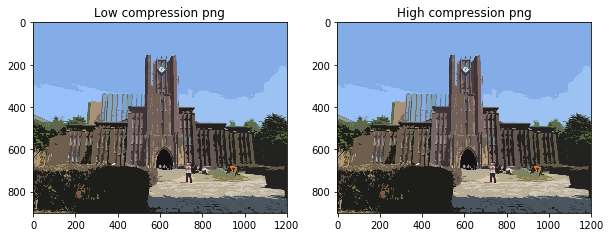

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import os
import time

illust = 'img/UTokyoYasudaIllust.png'
photo = 'img/UTokyoYasudaMini.jpg'

# 入力画像を写真とイラストで変えると、圧縮レベルの違いによる時間と画像サイズはどうなりますか？
input = illust
#input = photo

img_input = cv2.imread(input)
img_input = cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB) 

# pngでは圧縮レベルに変える時間を変えることができます。
# 圧縮レベルを下げると、画像サイズがどのように変わり、また表示される画像がどう変わるか見てみましょう

# 低圧縮
img_low_compression = 'img/low_compression.png'
Compression = 0 # 0～9
start = time.time()
cv2.imwrite(img_low_compression, 
            cv2.cvtColor(img_input, cv2.COLOR_RGB2BGR), 
            [int(cv2.IMWRITE_PNG_COMPRESSION), Compression])
process_time_low_compression = time.time() - start

# 高低圧縮
img_high_compression = 'img/high_compression.png'
Compression = 9 # 0～9
start = time.time()
cv2.imwrite(img_high_compression, 
            cv2.cvtColor(img_input, cv2.COLOR_RGB2BGR),
            [int(cv2.IMWRITE_PNG_COMPRESSION), Compression])
process_time_high_compression = time.time() - start

print('低圧縮PNG画像のサイズ: ', os.path.getsize(img_low_compression), '\t圧縮にかかった時間：', process_time_low_compression)
print('高圧縮PNG画像のサイズ: ', os.path.getsize(img_high_compression), '\t圧縮にかかった時間：', process_time_high_compression)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
img_out = cv2.imread(img_low_compression)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB) 
plt.imshow(img_out)
plt.title('Low compression png')

plt.subplot(1,2,2)
img_out = cv2.imread(img_high_compression)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB) 
plt.imshow(img_out)
plt.title('High compression png')


## 2.2 JPEG (Joint Photographic Experts Group) フォーマット

JPEGは非可逆圧縮です。見た目に影響の少ない情報を省く代わりに画像のサイズを小さくします。   
元の画像を復元することはできません。

Qualityが100だと非圧縮です。   
Qualityが10だと高圧縮となります。   
高圧縮の場合、非圧縮に比べて画像サイズは17分の1以下になっていますが、画像をよく見ると、なだらかに色が変化している空の部分にcompression artifactと呼ばれるひずみが現れていることが分かります（画面で分かりにくければ、保存している画像のほうで確認してください）。

JPEG圧縮はPNGの圧縮に比べて非常に高速です。


低圧縮JPEG画像のサイズ:  831720 	圧縮にかかった時間： 0.06066298484802246
高圧縮JPEG画像のサイズ:  47654 	圧縮にかかった時間： 0.025832414627075195


Text(0.5, 1.0, 'High compression jpg')

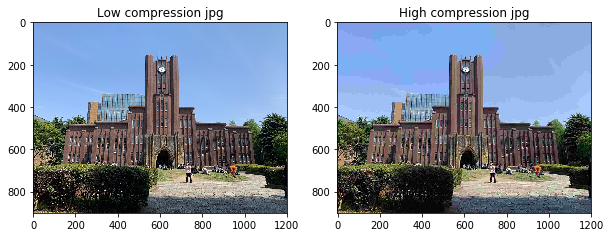

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import os
import time

illust = 'img/UTokyoYasudaIllust.png'
photo = 'img/UTokyoYasudaMini.jpg'

# 入力画像を写真とイラストで変えると、圧縮レベルの違いによる時間と画像サイズはどうなりますか？
#input = illust
input = photo

img_input = cv2.imread(input)
img_input = cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB) 

# jpegでは圧縮率を変えることができます。
# 圧縮率を下げると、画像サイズがどのように変わり、また表示される画像がどう変わるか見てみましょう

# 低圧縮
img_low_compression = 'img/low_compression.jpg'
Quality= 100 # 0～100
start = time.time()
cv2.imwrite(img_low_compression, 
            cv2.cvtColor(img_input, cv2.COLOR_RGB2BGR), 
            [int(cv2.IMWRITE_JPEG_QUALITY), Quality])
process_time_low_compression = time.time() - start

# 高低圧縮
img_high_compression = 'img/high_compression.jpg'
Quality= 10 # 0～100
start = time.time()
cv2.imwrite(img_high_compression, 
            cv2.cvtColor(img_input, cv2.COLOR_RGB2BGR),
            [int(cv2.IMWRITE_JPEG_QUALITY), Quality])
process_time_high_compression = time.time() - start

print('低圧縮JPEG画像のサイズ: ', os.path.getsize(img_low_compression), '\t圧縮にかかった時間：', process_time_low_compression)
print('高圧縮JPEG画像のサイズ: ', os.path.getsize(img_high_compression), '\t圧縮にかかった時間：', process_time_high_compression)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
img_out = cv2.imread(img_low_compression)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB) 
plt.imshow(img_out)
plt.title('Low compression jpg')

plt.subplot(1,2,2)
img_out = cv2.imread(img_high_compression)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB) 
plt.imshow(img_out)
plt.title('High compression jpg')

